<a href="https://colab.research.google.com/github/AlyW8/Data-Science/blob/main/AlysWangU6Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You need to submit a .ipynb file with the first four letters of one first name, the first four letters of one last name, and U6proj.

Ex.

A student named Avy Aguacate Avocado Palta will submit a file named "Avy_AvocU6proj.ipynb", since she normally just goes by Avy, and, when pressed, reports Avocado as her last name. The " _ " after "Avy" serves as the fourth "letter" in her first name.

Ex2.

Army Armadillo will submit a file named "ArmyArmaU6proj.ipynb"

# Unit 6 Project: Making a Generalized Linear Model (multiple predictors)

**Task**:

Two parts:

1. Propose a data set that's compatible with a generilized linear model structure built with pymc and/or bambi. Your data must have more than three potential predictor variables. I must approve your submission before you move on to part 2.

2. Create, analyze, and present a generalized linear model using pymc within the colab environment, on a data set of your choice, with the following conditions:
  - your final model must have more than 2 predictors. The intercept term doesn't count as a predictor here (even though technically it is).
  - You must document and explain your model selection method. This means you must show that your likelihood/link function combo is better than at least one other choice of likelihood/link function.
  - You must document and explain your variable selection method. This means you must show that your final model is better than at least one other version of the model with a different selection of variables.



Guidlines:

- You are allowed to copy and paste any code from the notes, including my answer key (AK), without any reference or citations. Same goes for the course textbook, BAP3.

- This is an individual project. It is fine if you model the same process as a peer, but your raw data **must** be substantially different. "Substantially different" means that I, your instructor, arbitrarily think your data sets are different enough.

- Do not look at other student's code/jupyter notebooks. Copying, or copying and pasting, other students code will result in a failing grade. Also, I will tell all the other teachers I know that you cheated.

- If you want to know what another student did, ask them--any verbal communication about a project is allowed and encouraged. If you want to see a graphic they made, ask them to sketch a picture of it for you by hand.

- Any handwritten communication is also allowed and encouraged, so long as all parties are in the same physical location together. Example: you may sketch out a piece of code while verbally explaining to someone what you did. Do NOT: hand write the code for your entire project, take a picture, and send it to everyone in the course.

- If you use someone's code from outside this course (like from the internet, an AI, or your parent), you must ask me if it is ok, and you must cite them in your work. I don't care all they did was to click your space bar one more time: you tell me, and you cite their contribution. You don't need to tell me about or cite verbal or handwritten communication though.

- You may use a more complicated model--like something from further along in the course--IF I give you permission.

- If you are unsure whether or not something is ok or allowed: ASK BEFORE YOU DO IT.

Faliure to adhere to these guidlines will result in a failing grade.

Tips:

- Try to pick something that you care about, have knowledge of, experience with, or that you find interesting/cool.

- Gather data *before* picking a likelihood.

-  Use your best idea now; maybe you can look at the context you used in the previous project, and gather different data from it.

- Choose a data set with lots of columns, and lots of potential interactions between variables. It'll be more fun, and will make model/variable selection more relevant.

- Linear models are generalized linear models. This is not a competition to come up with the most complicated hierearchical glm. Find a data set that interests you, and apply the simplest model that captures the patterns in the data.

- Comment heavily, and explain your steps and thought process with text blocks. This is not only requried, it'll also help you understand what you're doing and what you want to do.

- Want an example? The Unit6NotesAK *is* your example! Specifically, try to do something akin to using more of the columns in the basketball data to predict FG%. You are expected to be somewhere between a half and three-quarters as detailed--but more is always welcome.

- Its ok to pick a data set for which you don't qute understand the context--so long as you think the context is cool.


# Data

I'm using the penguin's data set that Mr. Arredondo gave us to try and predict flipper length.

In [1]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import graphviz as gv
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install bambi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.6/109.6 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.9/218.9 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.4/259.4 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.6/164.6 kB 11.1 MB/s eta 0:00:00


In [3]:
import bambi as bmb

In [4]:
peng = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/penguins.csv')

In [5]:
peng

,species,island,bill_length,bill_depth,flipper_length,body_mass,sex,year
0,Adelie,Torgersen,3.91,1.87,18.1,3.750,male,2007
1,Adelie,Torgersen,3.95,1.74,18.6,3.800,female,2007
2,Adelie,Torgersen,4.03,1.80,19.5,3.250,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,3.67,1.93,19.3,3.450,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,5.58,1.98,20.7,4.000,male,2009
340,Chinstrap,Dream,4.35,1.81,20.2,3.400,female,2009
341,Chinstrap,Dream,4.96,1.82,19.3,3.775,male,2009
342,Chinstrap,Dream,5.08,1.90,21.0,4.100,male,2009


In [6]:
peng = peng.dropna()
peng
##gemini used

,species,island,bill_length,bill_depth,flipper_length,body_mass,sex,year
0,Adelie,Torgersen,3.91,1.87,18.1,3.750,male,2007
1,Adelie,Torgersen,3.95,1.74,18.6,3.800,female,2007
2,Adelie,Torgersen,4.03,1.80,19.5,3.250,female,2007
4,Adelie,Torgersen,3.67,1.93,19.3,3.450,female,2007
5,Adelie,Torgersen,3.93,2.06,19.0,3.650,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,5.58,1.98,20.7,4.000,male,2009
340,Chinstrap,Dream,4.35,1.81,20.2,3.400,female,2009
341,Chinstrap,Dream,4.96,1.82,19.3,3.775,male,2009
342,Chinstrap,Dream,5.08,1.90,21.0,4.100,male,2009


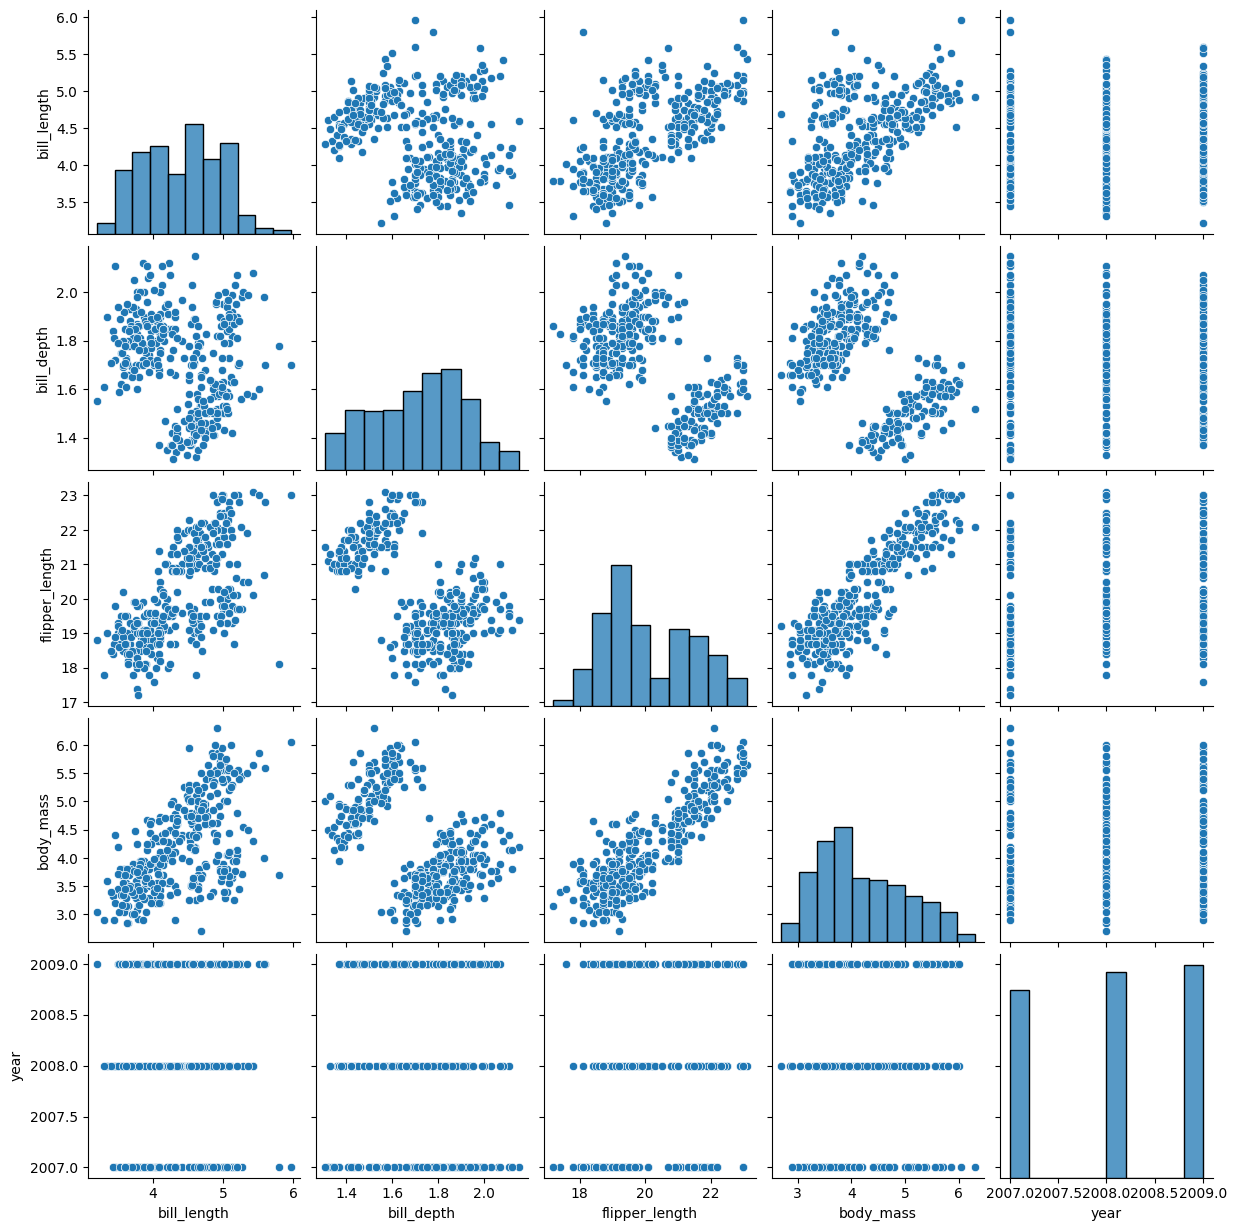

In [ ]:
sns.pairplot(peng)

##Causal Diagram

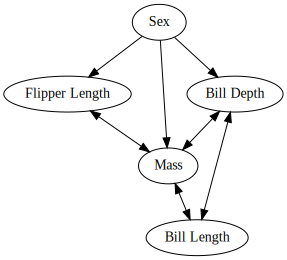

In [ ]:
dag_peng = gv.Digraph()

dag_peng.node('F','Flipper Length')
dag_peng.node('M','Mass')
dag_peng.node('D','Bill Depth')
dag_peng.node('L','Bill Length')
dag_peng.node('X','Sex')


dag_peng.edges(['XD','XF','XM'])
dag_peng.edge('F','M', dir = 'both')
dag_peng.edge('D','L', dir = 'both')
dag_peng.edge('M','L', dir = 'both')
dag_peng.edge('D','M', dir = 'both')

dag_peng

# Variable Selection

These sections were choosen based on the interactions I thought were most obvious in the pair plot, so there may be better combinations that I just didn't think to try.

1- all interactions in causal diagram- sex + flipper length + bill depth + bill length -> mass

2- flipper lenth -> mass

3- bill depth + sex -> mass

4- sex + bill depth + flipper length -> mass

5- bill depth + flipper length -> mass

6- bill depth + bill length -> mass

7- all variables individually -> mass

In [ ]:
model_peng_1 = bmb.Model("body_mass ~ sex + body_mass:flipper_length + bill_length:body_mass + bill_depth:body_mass + species:bill_length + bill_length:bill_depth + (flipper_length|sex) + (body_mass|sex) + (bill_depth|sex) ", peng)
idata_peng_1 = model_peng_1.fit(idata_kwargs={"log_likelihood":True})

In [ ]:
model_peng_2 = bmb.Model("body_mass ~ flipper_length", peng)
idata_peng_2 = model_peng_2.fit(idata_kwargs={"log_likelihood":True})

In [ ]:
model_peng_3 = bmb.Model("body_mass ~ sex + body_mass:bill_depth + (bill_depth|sex)", peng)
idata_peng_3 = model_peng_3.fit(idata_kwargs={"log_likelihood":True})

In [ ]:
model_peng_4 = bmb.Model("body_mass ~ sex + flipper_length:body_mass + bill_depth:body_mass + (bill_depth|sex) + (flipper_length|sex)",peng)
idata_peng_4 = model_peng_4.fit(idata_kwargs={"log_likelihood":True})

In [ ]:
model_peng_5 = bmb.Model("body_mass ~  flipper_length:body_mass + bill_depth:body_mass",peng)
idata_peng_5 = model_peng_5.fit(idata_kwargs={"log_likelihood":True})

In [ ]:
model_peng_6 = bmb.Model("body_mass ~ bill_length:body_mass + bill_depth:body_mass + bill_length:bill_depth",peng)
idata_peng_6 = model_peng_6.fit(idata_kwargs={"log_likelihood":True})

In [ ]:
model_peng_7 = bmb.Model("body_mass ~ bill_length + bill_depth + flipper_length + sex", peng)
idata_peng_7 = model_peng_7.fit(idata_kwargs={"log_likelihood":True})

In [14]:
p_df_bmb_2 = az.compare( {"peng_1":idata_peng_1,"peng_2":idata_peng_2,"peng_3":idata_peng_3,"peng_4":idata_peng_4,"peng_5":idata_peng_5,"peng_6":idata_peng_6,"peng_7":idata_peng_7} )
p_df_bmb_2

/usr/local/lib/python3.12/dist-packages/arviz/stats/stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
peng_1,0,6171.174611,33.199104,0.000000,1.0,0.251856,0.000000,False,log
peng_4,1,782.095908,11.369598,5389.078703,0.0,15.697134,15.548727,False,log
peng_3,2,529.858403,7.103703,5641.316208,0.0,14.301468,14.186657,False,log
peng_6,3,504.205069,10.273235,5666.969542,0.0,29.596914,29.472950,True,log
peng_5,4,304.615959,4.226039,5866.558652,0.0,12.792932,12.707224,False,log
peng_7,5,-117.775504,6.104431,6288.950115,0.0,11.644097,11.535493,False,log
peng_2,6,-163.740255,2.864418,6334.914865,0.0,13.020591,12.945969,False,log


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

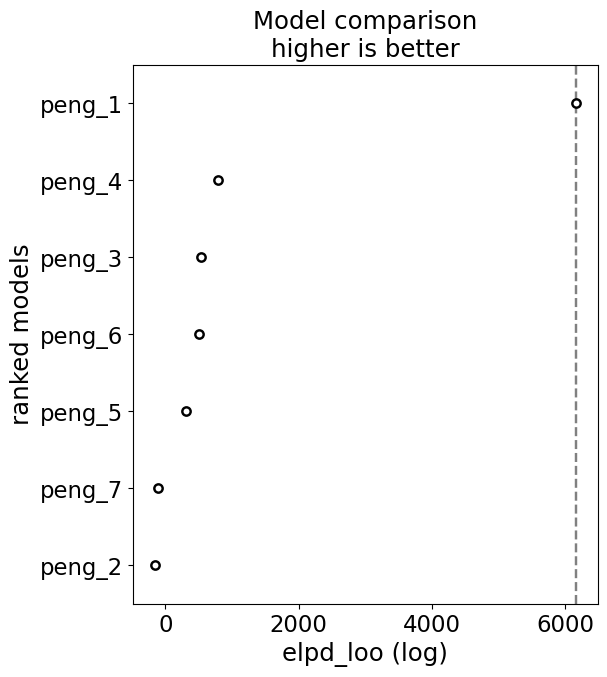

In [16]:
az.plot_compare(p_df_bmb_2)

Model 1 seems to be the best because it has the most positive elpd_loo. Model 1 models all of the interactions described in the causal diagram. Since Model 7, the one with no hierarchies and interactions, is also really bad, it seems that the interactions and hierarchies are actually really important to modeling body mass.

## Model Selection

The models above were done with normal distributions, as I don't know very much about the factors that contribute to a penguin's body mass, and I imagine it's influenced by many more items than what I have listed and many more than what I could possibly think of.

A penguin can't have negative body mass, however, which is what the normal model may suggest, so I'll try using a gamma distribution this time. I'll just do model_1, instead of trying it out with all 5.

Note: I got an absurd number of divergences from the gamma, so I tried that negative binomial and student t as well.

In [ ]:
#gamma
model_peng_1g = bmb.Model("body_mass ~ sex + body_mass:flipper_length + bill_length:body_mass + bill_depth:body_mass + species:bill_length + bill_length:bill_depth + (flipper_length|sex) + (body_mass|sex) + (bill_depth|sex) ", peng, family="gamma")
idata_peng_1g = model_peng_1g.fit(idata_kwargs={"log_likelihood":True})

In [ ]:
#negative binomial
model_peng_1nb = bmb.Model("body_mass ~ sex + body_mass:flipper_length + bill_length:body_mass + bill_depth:body_mass + species:bill_length + bill_length:bill_depth + (flipper_length|sex) + (body_mass|sex) + (bill_depth|sex) ", peng, family="negativebinomial")
idata_peng_1nb = model_peng_1nb.fit(idata_kwargs={"log_likelihood":True})

In [ ]:
#student t
model_peng_1t = bmb.Model("body_mass ~ sex + body_mass:flipper_length + bill_length:body_mass + bill_depth:body_mass + species:bill_length + bill_length:bill_depth + (flipper_length|sex) + (body_mass|sex) + (bill_depth|sex) ", peng, family="t")
idata_peng_1t = model_peng_1t.fit(idata_kwargs={"log_likelihood":True})

In [ ]:
p_df_bmb_2a = az.compare( {"peng_1":idata_peng_1,"peng_1g":idata_peng_1g,"peng_1nb":idata_peng_1nb,"peng_1t":idata_peng_1t} )
p_df_bmb_2a

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
peng_1,0,6414.542776,1.661888,0.000000,1.000000e+00,0.252513,0.000000,False,log
peng_1t,1,6234.829804,74.351804,179.712972,1.355010e-14,0.246616,0.033839,False,log
peng_1nb,2,-537.866764,0.463656,6952.409541,6.758402e-14,2.005623,1.964631,False,log
peng_1g,3,-1807.974361,282.179559,8222.517137,0.000000e+00,5.775302,5.773721,False,log


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

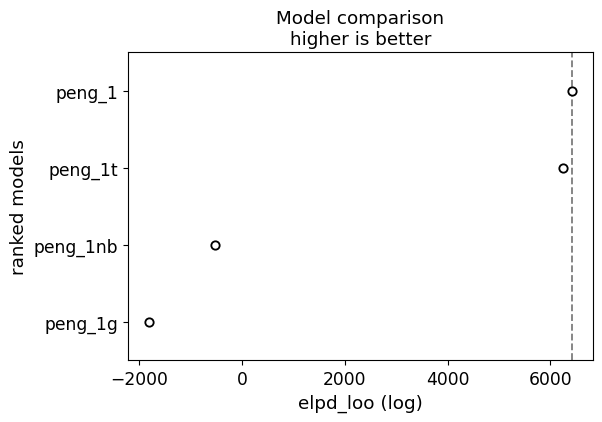

In [ ]:
az.plot_compare(p_df_bmb_2a)

It seems the normal distribution was the best one after all, though the student T also seems pretty good.

# Pretty Stuff
sex + flipper length + bill depth + bill length -> mass


<Axes: xlabel='body_mass'>

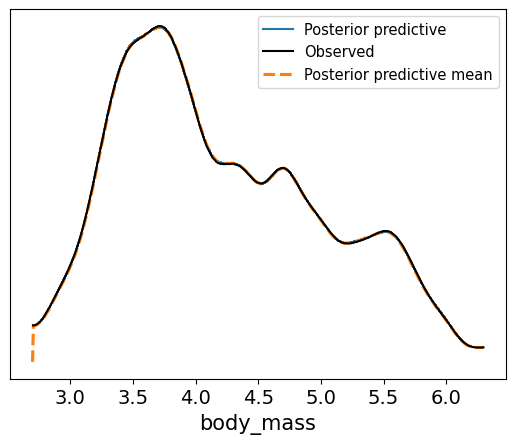

In [36]:
model_peng_1.predict(idata_peng_1, kind="response")
az.plot_ppc(idata_peng_1)

(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='flipper_length', ylabel='body_mass'>], dtype=object))

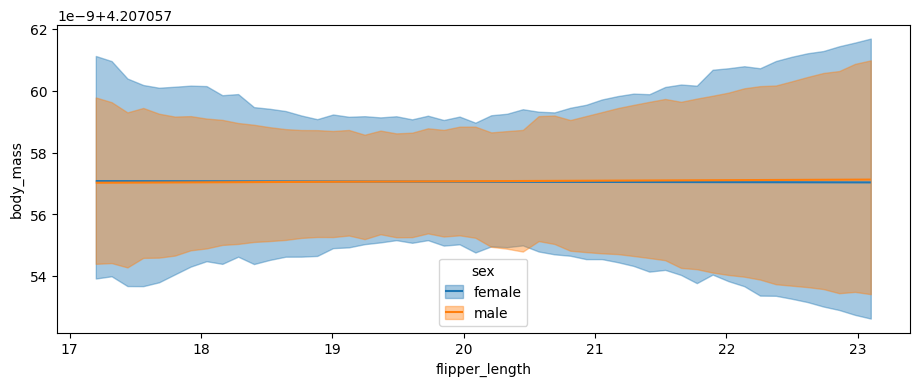

In [35]:
#flipper length
bmb.interpret.plot_predictions(model_peng_1,
                               idata_peng_1,
                                ["flipper_length",  "sex"], fig_kwargs={"figsize":(11, 4)})
#plt.plot(peng.flipper_length, peng.body_mass,"C2.",zorder = -3)


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='bill_depth', ylabel='body_mass'>], dtype=object))

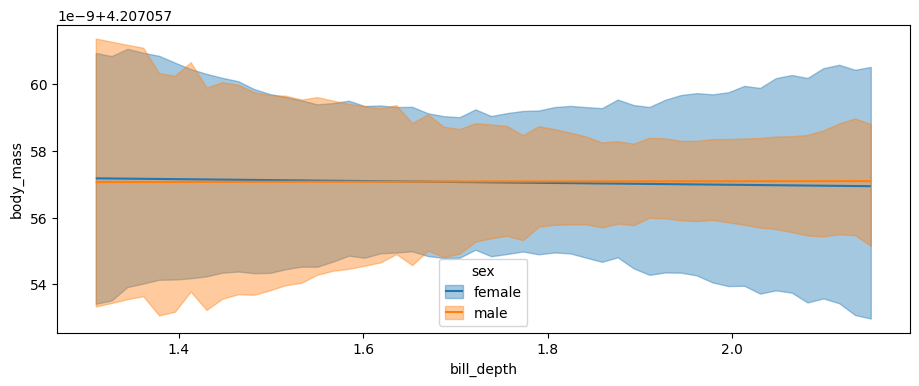

In [23]:
bmb.interpret.plot_predictions(model_peng_1,
                               idata_peng_1,
                                ["bill_depth",  "sex"], fig_kwargs={"figsize":(11, 4)})

(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='bill_length', ylabel='body_mass'>], dtype=object))

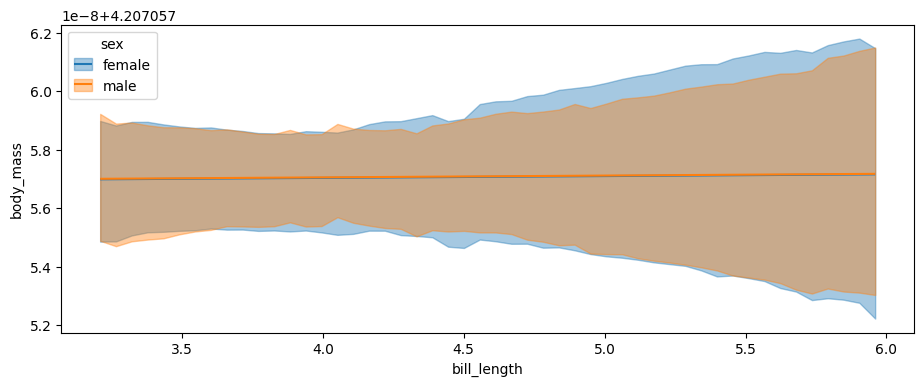

In [24]:
bmb.interpret.plot_predictions(model_peng_1,
                               idata_peng_1,
                                ["bill_length",  "sex"], fig_kwargs={"figsize":(11, 4)})

(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='bill_depth', ylabel='body_mass'>], dtype=object))

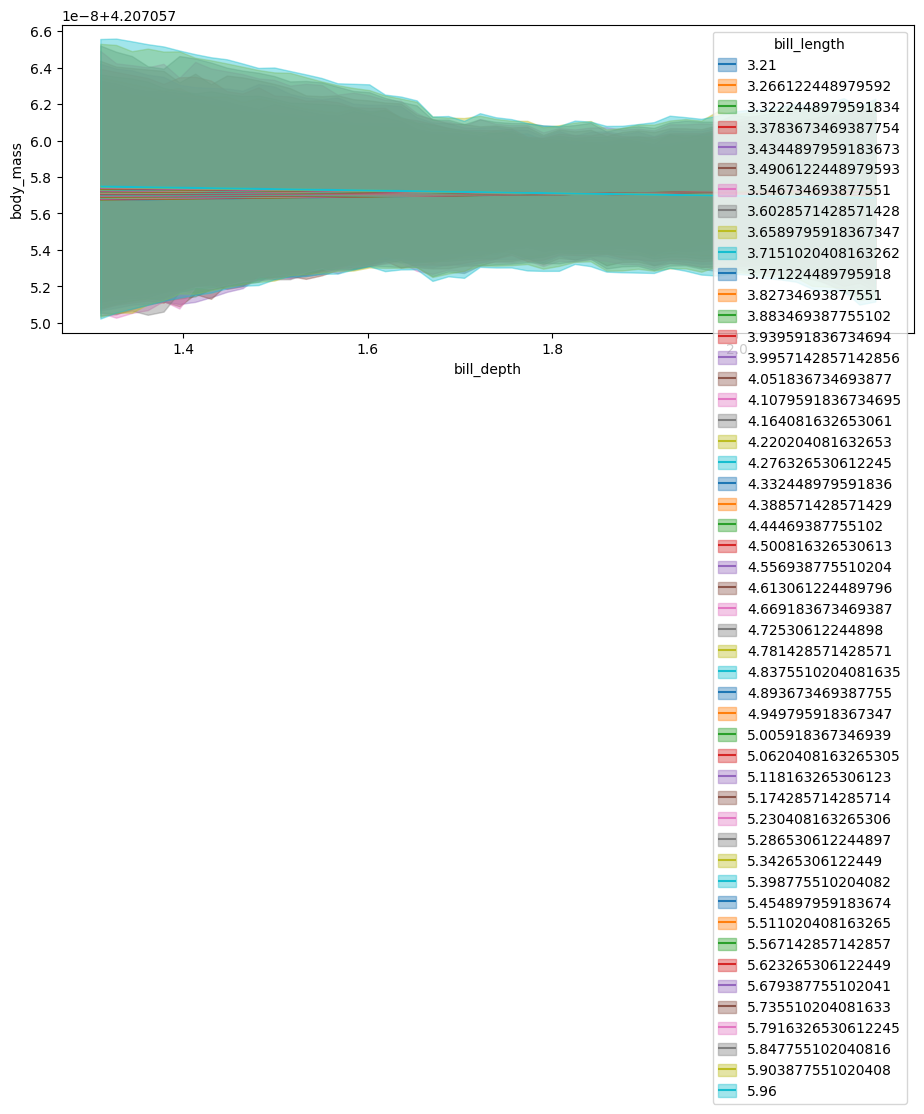

In [25]:
bmb.interpret.plot_predictions(model_peng_1,
                               idata_peng_1,
                                ["bill_depth","bill_length"], fig_kwargs={"figsize":(11, 4)})

(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='flipper_length', ylabel='body_mass'>], dtype=object))

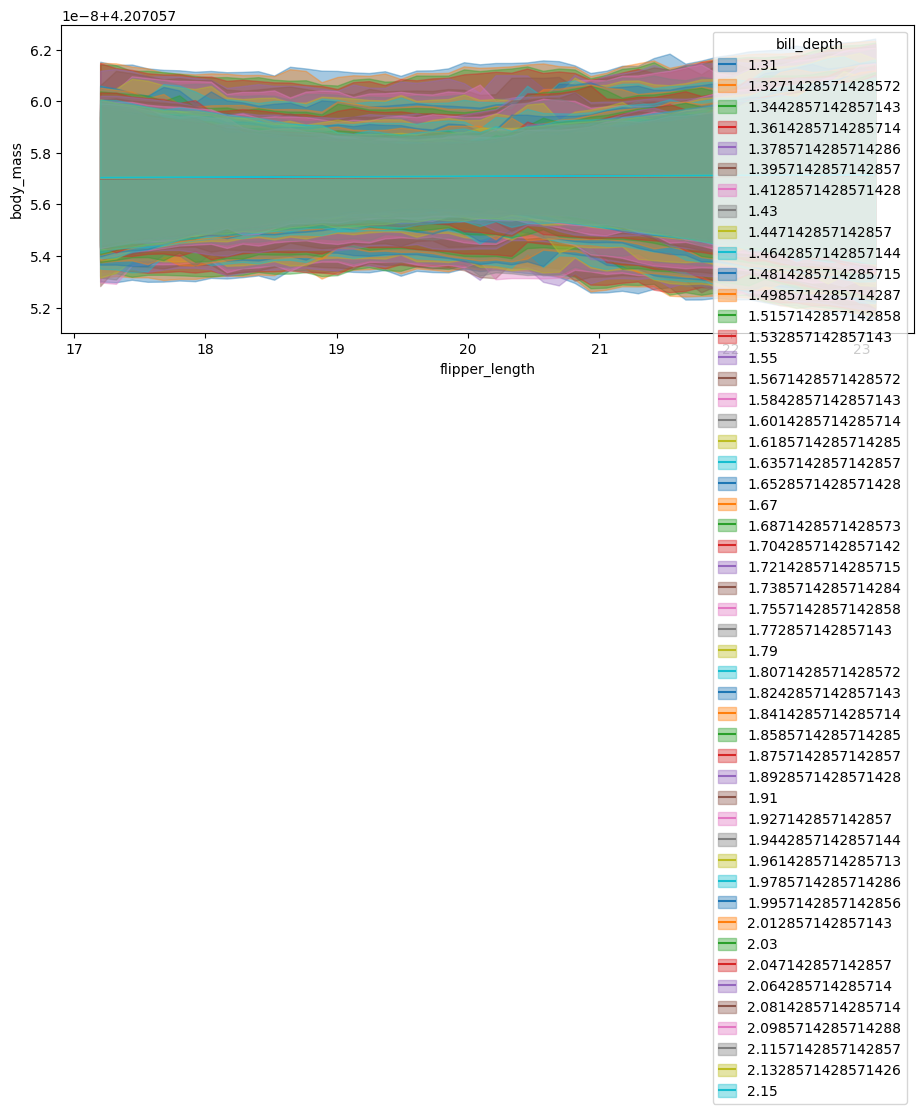

In [26]:
bmb.interpret.plot_predictions(model_peng_1,
                               idata_peng_1,
                                ["flipper_length",  "bill_depth"], fig_kwargs={"figsize":(11, 4)})

(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='flipper_length', ylabel='body_mass'>], dtype=object))

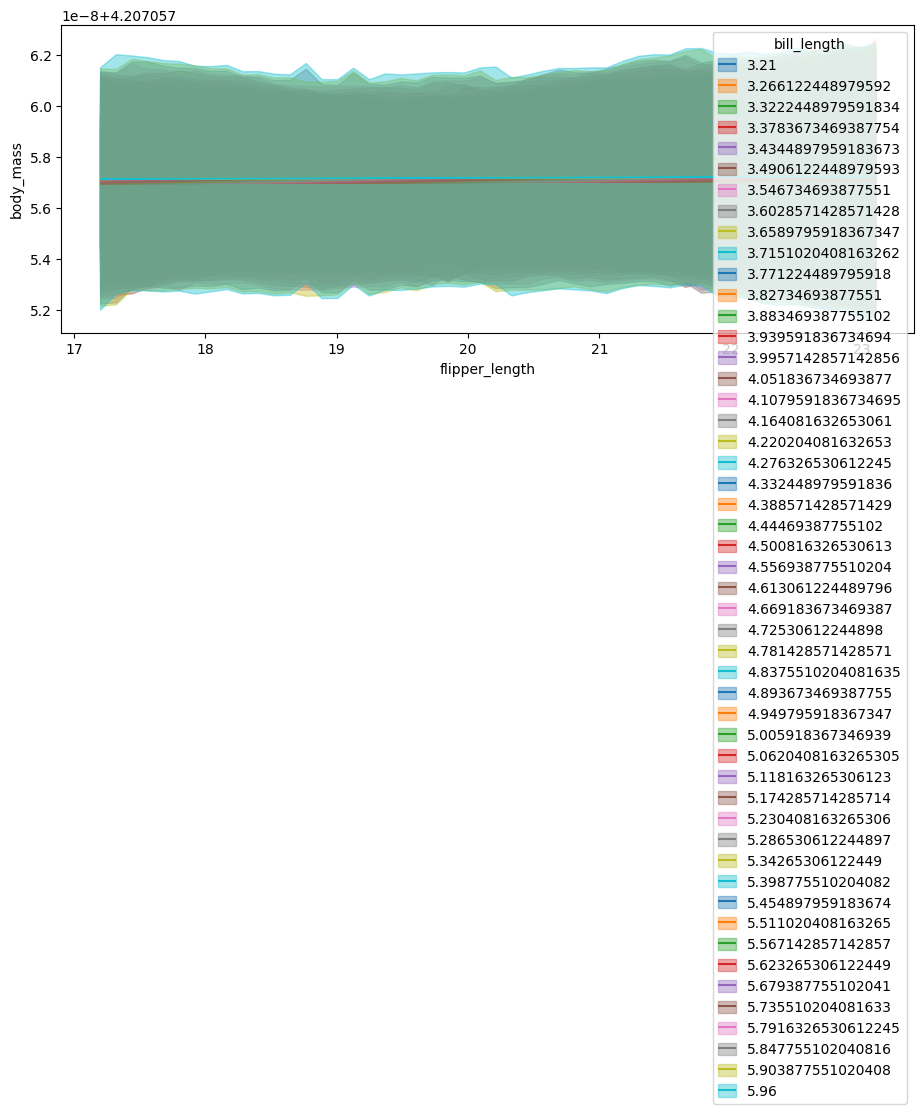

In [27]:
bmb.interpret.plot_predictions(model_peng_1,
                               idata_peng_1,
                                ["flipper_length",  "bill_length"], fig_kwargs={"figsize":(11, 4)})